## Q1. Install and load the latest versions of TensorFlow and Keras. Print  their versions.

In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
print(f"Version Of Tensorflow is {tf.__version__}")
print(f"Version Of Keras of Tensorflow is {tf.keras.__version__}")

Version Of Tensorflow is 2.12.0
Version Of Keras of Tensorflow is 2.12.0


## Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [65]:
df=pd.read_csv("/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [66]:
df.shape

(1599, 12)

## Q3. Check for null values, identify categorical variables, and encode them

In [67]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is No Null Value in dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Feature Quality is an Catagorical Feature

In [69]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [70]:
df["quality"].unique()

array(['bad', 'good'], dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded=encoder.fit_transform(df[["quality"]])

In [76]:
df["quality"]=encoded

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


## Q4. Separate the features and target variables from the dataframe.

In [78]:
## Segrating the Dependent and Independent Variables
X=df.drop(labels=["quality"],axis=True)
y=df["quality"]

In [79]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [80]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets

In [81]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [82]:
X_train_full.shape

(1119, 11)

In [83]:
y_train_full.shape

(1119,)

In [84]:
X_valid,X_train=X_train_full[:100],X_train_full[100:]
y_valid,y_train=y_train_full[:100],y_train_full[100:]

## Q6. Perform scaling on the dataset

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables

In [103]:
LAYERS = [tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1",input_dim=11),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="softmax", name="outputLayer")]



## Q8. Create a Sequential model and add all the layers to it.

In [104]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [105]:
model_clf.layers

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [106]:
import os
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_08_22_02_36_20


## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if  no improvement is observed

In [107]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## 11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [108]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

## Q12. Print the model summary.

In [109]:
model_clf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [110]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [111]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [114]:
EPOCHS =10
VALIDATION_SET=(X_valid,y_valid)

history =  model_clf.fit(X_train,y_train,epochs=EPOCHS,
                         validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/10
32/32 [==============================] - 2s 13ms/step - loss: 0.5766 - accuracy: 0.4681 - val_loss: 0.5816 - val_accuracy: 0.5400
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.4681 - val_loss: 0.5633 - val_accuracy: 0.5400
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4828 - accuracy: 0.4681 - val_loss: 0.5854 - val_accuracy: 0.5400
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.4681 - val_loss: 0.5558 - val_accuracy: 0.5400
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.4681 - val_loss: 0.5681 - val_accuracy: 0.5400
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.4681 - val_loss: 0.5690 - val_accuracy: 0.5400
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.4681 - val_loss: 0.5788 - val_accuracy: 0.5400
Epoch 8/10
32/32 [=

In [117]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/10
32/32 [==============================] - 2s 11ms/step - loss: 0.4619 - accuracy: 0.4681 - val_loss: 0.5587 - val_accuracy: 0.5400
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4589 - accuracy: 0.4681 - val_loss: 0.5635 - val_accuracy: 0.5400
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.4681 - val_loss: 0.5616 - val_accuracy: 0.5400
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.4681 - val_loss: 0.5678 - val_accuracy: 0.5400
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.4681 - val_loss: 0.6342 - val_accuracy: 0.5400
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.4681 - val_loss: 0.6066 - val_accuracy: 0.5400


In [118]:
#Saving the model
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [119]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2023_08_22_02_40_11_.h5 will be saved at TRAINED_MODEL/Model_2023_08_22_02_40_11_.h5


'TRAINED_MODEL/Model_2023_08_22_02_40_11_.h5'

In [120]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

## Q16. Get the model's parameters

In [121]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 32}

## Q17. Store the model's training history as a Pandas DataFrame.

In [122]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.461855,0.468106,0.558742,0.54
1,0.458869,0.468106,0.563491,0.54
2,0.446642,0.468106,0.561566,0.54
3,0.437836,0.468106,0.567752,0.54
4,0.425718,0.468106,0.634208,0.54
5,0.429443,0.468106,0.606577,0.54


## Q18. Plot the model's training history.

<Axes: >

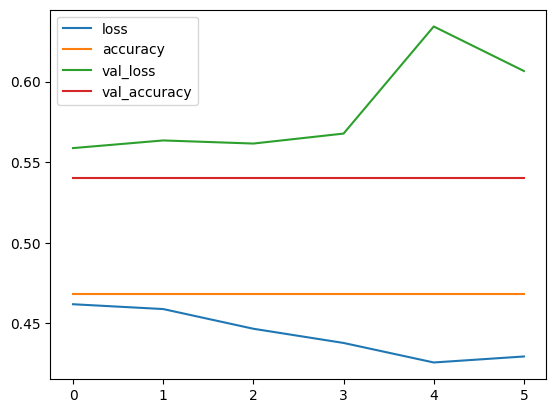

In [123]:
pd.DataFrame(history.history).plot()

## Q19. Evaluate the model's performance using the test data.

In [124]:
model_clf.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.4437


[0.516826868057251, 0.4437499940395355]